# ` Status`

In [ ]:
!pip install basedosdados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import basedosdados as bd

municipio = bd.read_sql(
    '''
SELECT * FROM `basedosdados-dev.br_ipea_avs.municipio`
WHERE sigla_uf = 'RJ' and raca_cor != 'total'
    ''',
    billing_project_id='basedosdados-dev'
)

Downloading: 100%|██████████| 3152/3152 [00:02<00:00, 1254.33rows/s]


In [ ]:
municipio_rio = municipio[['ano', 'sexo',
                 'sigla_uf',
                 'raca_cor',
                 'sexo',
                 'propocao_energia_eletrica',
                 'proporcao_sem_agua_esgoto',
                 'proporcao_sem_coleta',
                 'expectativa_vida',
                 'prosperidade_social',
                  'idhm',
                  'idhm_l',
                  'idhm_e',
                  'idhm_r',
                  'idhm_subescolaridade',
                  'idhm_subfrequencia']]

# Serviços Essenciais

> Energia Eletrica - Não iremos utilizar na analise

> Abastecimento de água e coleta de lixo

> Coleta adequada de lixo


`Energia Eletrica`

Razão entre a população que vive em domicílios particulares permanentes com iluminação elétrica e a população total residente em domicílios particulares permanentes multiplicado por 100. Considera-se iluminação proveniente ou não de uma rede geral, com ou sem medidor.

`Não entra na análise`

`Os níveis são muito próximos.`

In [ ]:
municipio_rio_energia = municipio_rio.groupby(['ano', 'sigla_uf', 'raca_cor'])['propocao_energia_eletrica'].mean().reset_index()
municipio_rio_energia

,ano,sigla_uf,raca_cor,propocao_energia_eletrica
0,2000,RJ,branco,97.906672
1,2000,RJ,negro,96.462658
2,2010,RJ,branco,99.828565
3,2010,RJ,negro,99.596517


## `Abastecimento de agua e esgoto`

% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados

In [ ]:
municipio_rio_esgoto = round(municipio_rio.groupby(['ano', 'sigla_uf', 'raca_cor'])['proporcao_sem_agua_esgoto'].mean().reset_index(),1)

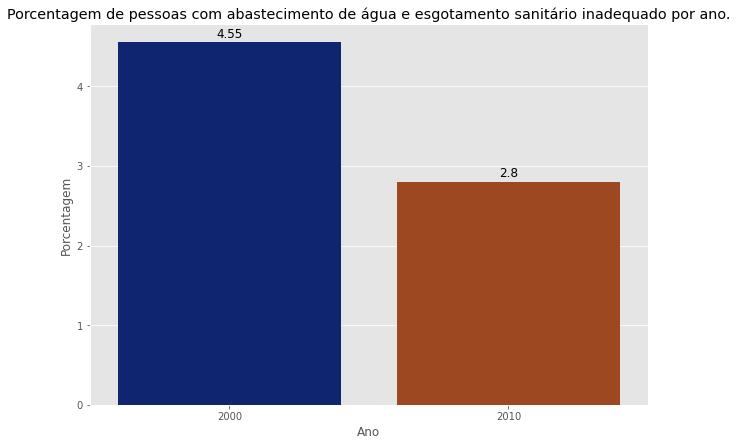

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

plot = sns.barplot(data=municipio_rio_esgoto,
            x='ano',
            y='proporcao_sem_agua_esgoto',
            palette='dark', ci=None)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.title('Porcentagem de pessoas com abastecimento de água e esgotamento sanitário inadequado por ano.')
plt.xlabel('Ano')
plt.ylabel('Porcentagem')
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/coleta_lixo_ano.svg', dpi=350)
plt.show()

```
Variação percentual
```

> Houve uma queda de 38.46% de pessoas com abastecimento de água e esgotamento sanitário inadequado entre os anos 2000 e 2010.



In [ ]:
municipio_rio_esgoto_cor = round(municipio_rio.groupby(['ano', 'raca_cor'])['proporcao_sem_agua_esgoto'].mean().reset_index(),1)
municipio_rio_esgoto_cor.sort_values('proporcao_sem_agua_esgoto', ascending=False)

,ano,raca_cor,proporcao_sem_agua_esgoto
1,2000,negro,6.0
3,2010,negro,3.4
0,2000,branco,3.1
2,2010,branco,2.2


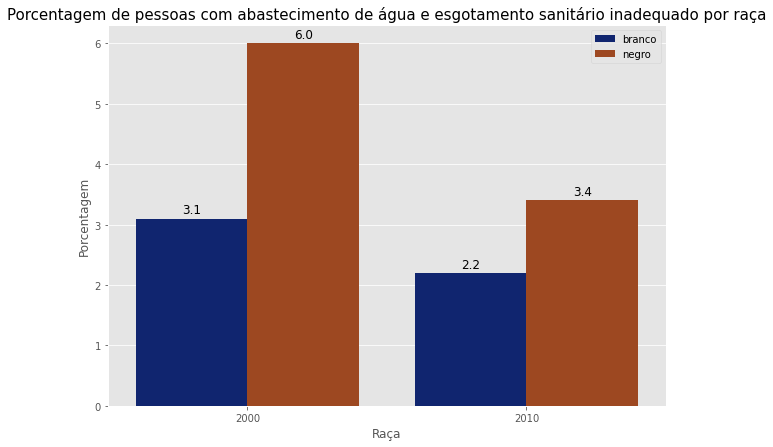

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

plot = sns.barplot(data=municipio_rio_esgoto_cor,
            x='ano',
            y='proporcao_sem_agua_esgoto',
            hue='raca_cor',
            palette='dark',
            ci=None)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )


plt.title('Porcentagem de pessoas com abastecimento de água e esgotamento sanitário inadequado por raça', fontsize=15)
plt.xlabel('Raça')
plt.ylabel('Porcentagem')
plt.legend()
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/agua_esgoto_raca_ano.svg', dpi=350)
plt.show()



   
*  
```
 Abastecimento de água e esgotamento sanitário inadequado:
``` 


> Podemos notar que houve uma melhora signiticativa no abastecimento de água e esgotamento inadequado no Estado do Rio de Janeiro, logo em 2000, a taxa média de pessoas com abastecimento de água e esgoto inadequado era de 4.54% e no ano de 2010, foi reduzido para 2.79%



> Em relação ao recorte de cor, podemos notar que também houve uma queda referente ao processo de abastecimento de água e esgoto inadequado. No ano de 2000, 3.1% dos brancos não dispunham de abastecimento de água e esgoto, enquanto negros era de 6%. Houve melhorias, uma vez que brancos dispunhem 2.21% e negros 3.36% de abastecimento de água e esgoto inadequado.


```
*   Variação percentual por raça
```

> `Nessa análise, a ideia é perceber a diferença percentual entre brancos e pretos que recebem abastecimento de água e esgotamento sanitário inadequado nos anos de 2000 e 2010.`


> Houve uma queda de 29% relacionado a pessoas brancas com água e esgotamento sanitário inadequado, quanto para pessoas negras, houve uma queda de 43%.  



##`Coleta de lixo`

% da população que vive em domicílios urbanos sem o serviço de coleta de lixo

In [ ]:
municipio_rio_lixo = round(municipio_rio.groupby(['ano', 'raca_cor'])['proporcao_sem_coleta'].mean().reset_index(),1)
municipio_rio_lixo.sort_values('proporcao_sem_coleta', ascending=False)

,ano,raca_cor,proporcao_sem_coleta
1,2000,negro,9.9
0,2000,branco,5.9
3,2010,negro,2.6
2,2010,branco,1.5


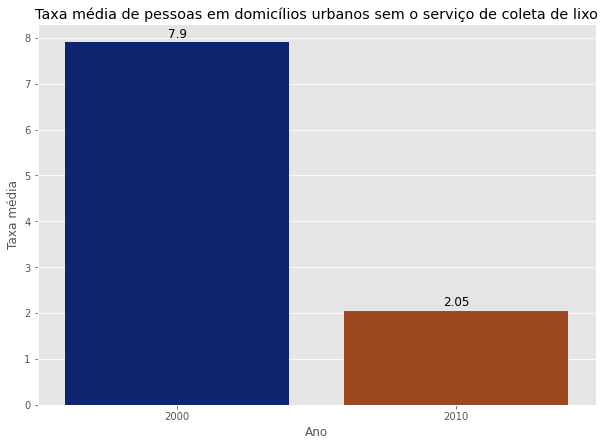

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7)) 

plot = sns.barplot(data= municipio_rio_lixo,
            x='ano',
            y='proporcao_sem_coleta',
            errwidth = 1,
            palette='dark',
            ci = None)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )
   
plt.title('Taxa média de pessoas em domicílios urbanos sem o serviço de coleta de lixo')
plt.xlabel('Ano')
plt.ylabel('Taxa média')
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/coleta_lixo_ano.svg', dpi=350)
plt.show()

```
*   Variação por ano

```



`Nesses 10 anos, houve uma queda de 74.05% de pessoas em dimicíos urbanos sem coleta de lixo adequada no estado do Rio de Janeiro.`





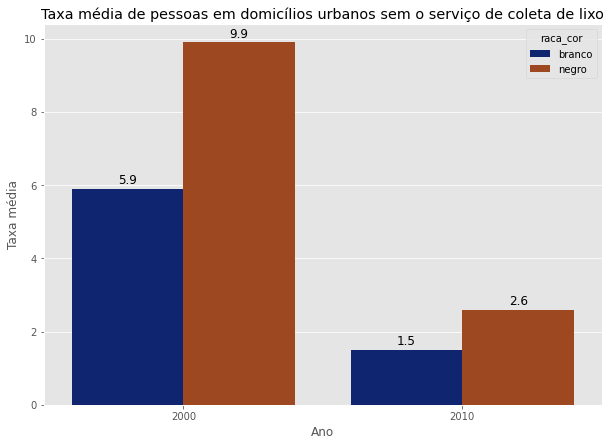

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7)) 

plot = sns.barplot(data= municipio_rio_lixo,
            x='ano',
            y='proporcao_sem_coleta',
            hue='raca_cor',
            errwidth = 1,
            palette='dark')

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )
   
plt.title('Taxa média de pessoas em domicílios urbanos sem o serviço de coleta de lixo')
plt.xlabel('Ano')
plt.ylabel('Taxa média')
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/coleta_lixo_ano_cor.svg', dpi=350)
plt.show()

```
*   Variação percentual por raça
```
> `Nessa análise, a ideia é perceber a diferença percentual entre brancos e pretos que recebem coleta de lixo adequado nos anos de 2000 e 2010.`


> Houve uma queda de 74.57% de pessoas brancas sem coleta de lixo adequado entre os anos de 2000 e 2010, enquanto houve uma queda de 73.73% relacionado a pessoas negras no mesmo período.

In [ ]:
municipio_rio_lixo_cor = round(municipio_rio.groupby(['raca_cor'])['proporcao_sem_coleta'].mean().reset_index(),1)
municipio_rio_lixo_cor

,raca_cor,proporcao_sem_coleta
0,branco,3.7
1,negro,6.2


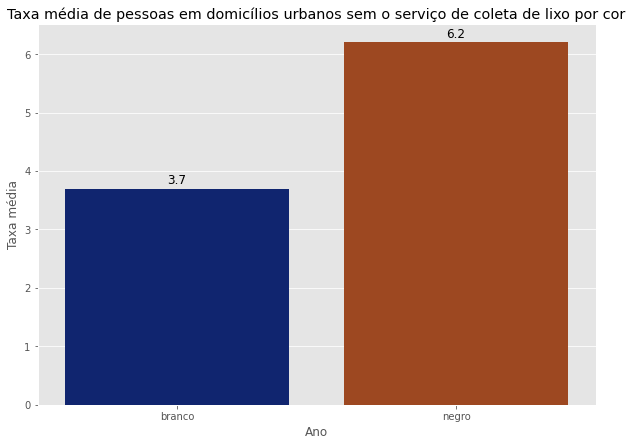

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

plot = sns.barplot(data=municipio_rio_lixo_cor,
            x='raca_cor',
            y='proporcao_sem_coleta',
            palette='dark')
  
for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.title('Taxa média de pessoas em domicílios urbanos sem o serviço de coleta de lixo por cor')
plt.xlabel('Ano')
plt.ylabel('Taxa média')
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/coleta_lixo_cor.svg', dpi=350)
plt.show()

`Variação percentual entre brancos e negros relacionado a coletiva de lixo inadequado: 68.74%`

### As analises referentes a serviços essenciais seguem o mesmo padrão para serem analisados:



   
*  
```
 Coleta de lixo:
``` 


> Podemos notar que houve melhorias significativas na coleta de lixo no Estado do Rio de Janeiro, percebmos que em 2000, a taxa média de pessoas com coleta de lixo inadequada era de quase 8%, 10 anos depois, houve uma queda de suma importância, sendo reduzido para 2.05%. 



> Em relação ao recorte de cor, podemos notar que também houve uma queda referente ao processo de coleta de lixo para pessoas brancas e negras no Estado do Rio de Janeiro, em 2000 brancos tinham 5.9% de coleta de lixo inadequado, enquanto negros tinham quase 10%. Houve uma grande queda tanto para negros e brancos, demonstrado em 2010, pessoas brancas tendo 1.5% e pessoas negras tinham 2.6%.








# `Expectativa de vida`

> Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import basedosdados as bd

municipio_ano = bd.read_sql(
    '''
SELECT
  *
FROM
  `basedosdados-dev.br_ipea_avs.municipio`
WHERE
  sigla_uf = 'RJ'
  AND raca_cor != 'total'
  AND ano = 2010
    ''',
    billing_project_id='basedosdados-dev'
)

Downloading: 100%|██████████| 1590/1590 [00:01<00:00, 1138.80rows/s]


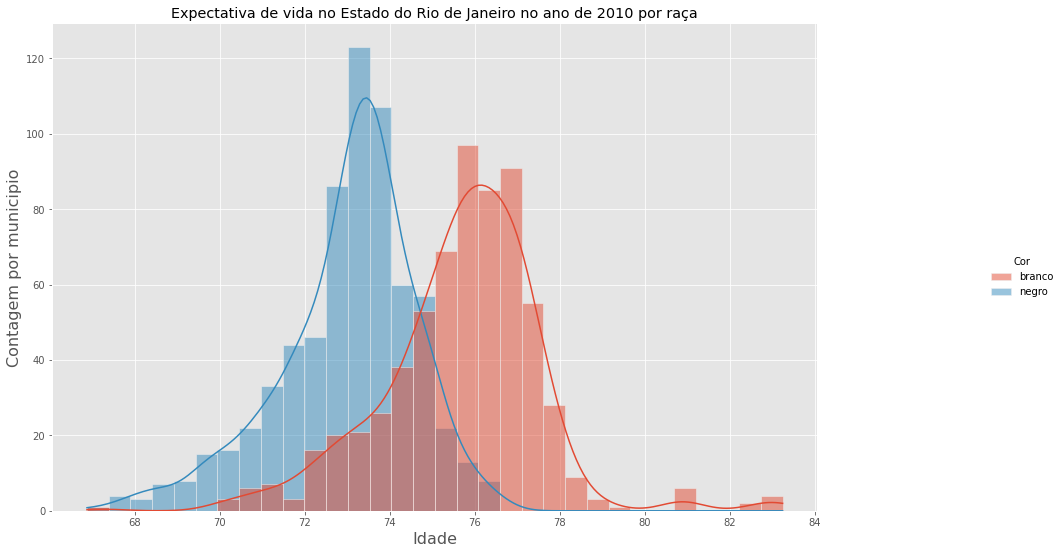

In [ ]:
ax = sns.displot(data=municipio_ano,
                 x='expectativa_vida',
                 kde=True,
                 hue='raca_cor')

plt.title('Expectativa de vida no Estado do Rio de Janeiro no ano de 2010 por raça')
plt.xlabel('Idade', fontsize=16)
plt.ylabel('Contagem por municipio', fontsize=16)

ax.figure.set_size_inches(16, 8)
ax._legend.set_title('Cor')
#plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/expectativa_de_vida.svg', dpi=350)
plt.show()

# IDHM - `Indice de Desenvolvimento Humano Municipal`

In [ ]:
municipio_rio_idhm_ano = municipio_ano.groupby(['ano', 'raca_cor'])[['idhm_r']].mean().reset_index()
municipio_rio_idhm_ano

,ano,raca_cor,idhm_r
0,2010,branco,0.730102
1,2010,negro,0.654579


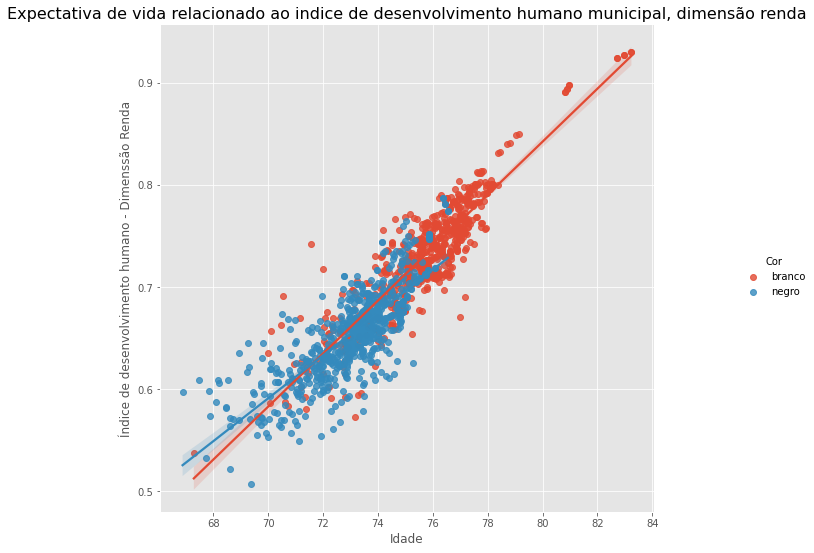

In [ ]:
ax=sns.lmplot(data=municipio_ano,
            x='expectativa_vida',
            y='idhm_r', 
            hue='raca_cor')

plt.title('Expectativa de vida relacionado ao indice de desenvolvimento humano municipal, dimensão renda', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Índice de desenvolvimento humano - Dimenssão Renda')
ax.figure.set_size_inches(10, 8)
ax._legend.set_title('Cor')
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/dimesao_renda.svg', dpi=350)
plt.show()

`Relação entre expectativa de vida e idhm, renda:`



> Nota-se claramente que há uma acentuada noção de que pessoas brancas dispõe de mais renda e consequentemente, uma expectativa maior no Estado do Rio de Janeiro. 

> Pessoas negras tem uma renda inferior a pessoas brancas.



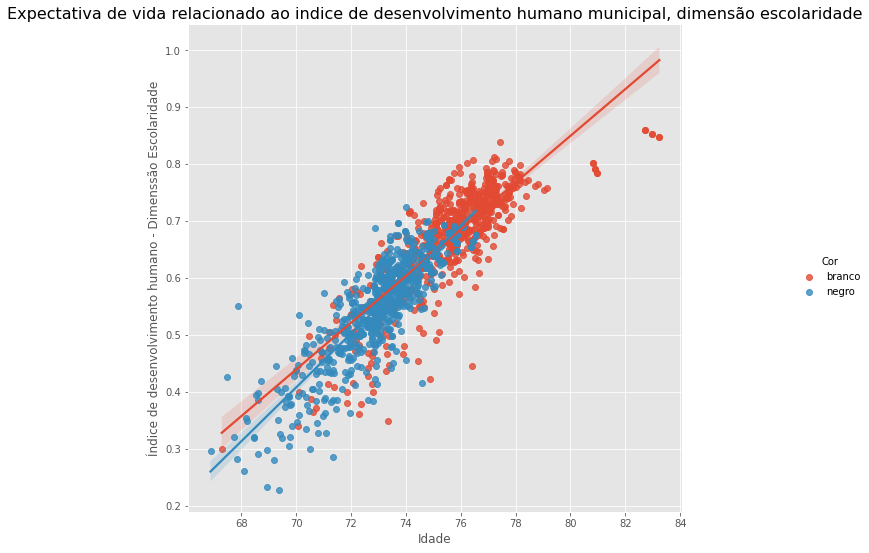

In [ ]:
ax=sns.lmplot(data=municipio_ano,
            x='expectativa_vida',
            y='idhm_e', 
            hue='raca_cor')

plt.title('Expectativa de vida relacionado ao indice de desenvolvimento humano municipal, dimensão escolaridade', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Índice de desenvolvimento humano - Dimenssão Escolaridade')
ax.figure.set_size_inches(10, 8)
ax._legend.set_title('Cor')
plt.savefig('/content/drive/Shareddrives/Base dos Dados - Geral/Dados/Conjuntos/br_ipea_avs/dimesao_escolaridade.svg', dpi=350)
plt.show()

# ` Análise final:`



> A analise é muito clara no demonstrativo de que as condições de infraestrutura, saneamento básico e expectativa de vida melhorou durante os anos de 2000 à 2010 e também outra sinalização importante é como que a disparidade social entre pretos e brancos vem diminuindo com o tempo. Entretanto, ainda que esteja diminuindo, não é o suficiente no processo de equidade entre as raças, pessoas brancas tem diversas vantagens sociais e relacionado a própria vida que a população negra não tem.

